<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2.3 使用PyTorch构建神经网络

In [1]:
import torch

# 1. define input: x and output: y
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [2]:
# 2. 将输入列表转换为浮点张量对象
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [3]:
# 将数据注册到设备中
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [4]:
import torch.nn as nn

In [5]:
# 3. 定义神经网络架构
# nn.Module是所有神经网络模块的基类
class MyNeuralNet(nn.Module):
    # 使用__init__方法初始化神经网络的所有组件
    def __init__(self):
        # 必须调用super().__init__()来确保类继承nn.Module
        super().__init__()
        # 定义神经网络的层
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    # 必须使用forward作为函数名 PyTorch保留了这个函数作为执行前向传播的方法
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

# 可以通过输出来理解上述代码中函数nn.Linear方法完成的功能
print(nn.Linear(2, 7))

Linear(in_features=2, out_features=7, bias=True)


In [6]:
# 4. 可以通过以下步骤获取每个组件的初始权重
# 定义MyNeuralNet类对象的一个实例 并注册到device
mynet = MyNeuralNet().to(device)

# 可以通过以下方式获取每一层的权重和偏置项
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.6179,  0.4473],
        [-0.3869, -0.2472],
        [ 0.4835,  0.1609],
        [ 0.6792, -0.5558],
        [ 0.5160,  0.4921],
        [ 0.2755, -0.5618],
        [-0.2826,  0.4804],
        [ 0.3036,  0.5293]], device='cuda:0', requires_grad=True)

In [7]:
# 可以使用下列代码获得神经网络的所有参数
mynet.parameters()

<generator object Module.parameters at 0x00000221D202AC10>

In [8]:
# 上述代码返回一个生成器对象
# 通过循环遍历生成器 可以得到如下参数
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[-0.6179,  0.4473],
        [-0.3869, -0.2472],
        [ 0.4835,  0.1609],
        [ 0.6792, -0.5558],
        [ 0.5160,  0.4921],
        [ 0.2755, -0.5618],
        [-0.2826,  0.4804],
        [ 0.3036,  0.5293]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.3732,  0.2767,  0.1508, -0.1812,  0.0356,  0.1483,  0.0163, -0.6178],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1179,  0.2062,  0.3422, -0.0870, -0.2650, -0.2286, -0.0238,  0.1047]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.1619], device='cuda:0', requires_grad=True)


In [9]:
# 使用nn.Parameter函数定义神经网络模型的另一种方法如下
class MyNeuralNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Parameter(torch.rand(2, 8))
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Parameter(torch.rand(8, 1))
    # 必须使用forward作为函数名 PyTorch保留了这个函数作为执行前向传播的方法
    def forward(self, x):
        x = x @ self.input_to_hidden_layer
        x = self.hidden_layer_activation(x)
        x = x @ self.hidden_to_output_layer
        return x

In [10]:
# 5. 定义用于最优化的损失函数 (由于回归任务预测的是连续输出, 这里将优化均方误差)
loss_func = nn.MSELoss()

In [11]:
# 通过将输入值传递给neuralnet对象, 然后计算给定输入的MSELoss, 就可以计算出神经网络的损失值
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(95.6832, device='cuda:0', grad_fn=<MseLossBackward0>)


In [12]:
from torch.optim import SGD

# 6. 定义优化器, 这里使用SGD随机梯度下降的优化方法, 在初始化时需指定更新的参数和学习率
opt = SGD(mynet.parameters(), lr = 0.001)

In [13]:
# 7. 在一轮中一起执行所有要做的步骤
# 计算给定输入和输出所对应的损失值
# 计算每个参数对应的梯度
# 根据每个参数的学习率和梯度更新权重
# 一旦权重被更新, 就要确保在下轮计算梯度之前刷新上一步计算的梯度

loss_history = [] # 存储每轮的损失值
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

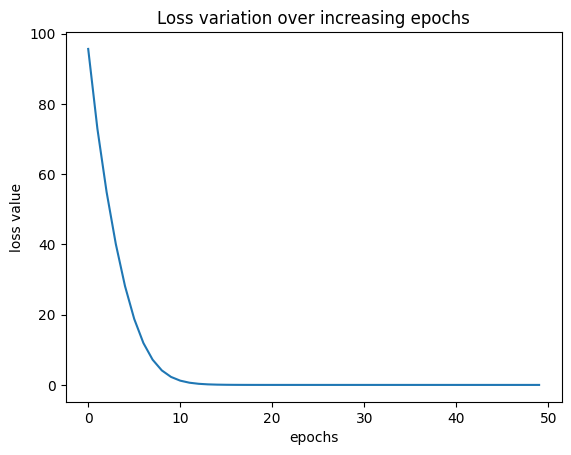

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# 绘制出损失随着轮数增加而发生的变化
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')
